In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
models_ran = [
    'LC_discrete_attention',
    'change_d_obs_fk',
    'change_d_obs_cause_effect',
    'change_d_obs_cause',
    'LC_discrete',
    'normative',
    'ces_strength',
]

file_tags = [
    ['att', 'att_prior'],
    ['att_cha', 'att_cha_prior'],
    ['att_cha'],
    ['att_cha'],
    [1, 'prior_100'],
    [1, 'prior'],
    [1]
]

model_labels = [
    ['LC w. attention', 'LC w. attention w. prior'],
    ['Change w. full knowledge', 'Change w. full knowledge w. prior'],
    ['Change linear cause effect'],
    ['Change linear cause'],
    ['LC basic', 'LC basic w. prior'],
    ['normative', 'normative w. prior'],
    ['CES strength sensitive']
]

model_names = []
for names in model_labels:
    model_names += names

color_dict = {
    'LC w. attention': sns.light_palette("seagreen").as_hex()[-1], 
    'LC w. attention w. prior': sns.light_palette("seagreen").as_hex()[-2],
    'Change w. full knowledge': sns.color_palette("mako").as_hex()[1], 
    'Change w. full knowledge w. prior': sns.color_palette("mako").as_hex()[2],
    'Change linear cause effect': sns.color_palette("mako").as_hex()[3],
    'Change linear cause': sns.color_palette("mako").as_hex()[4],
    'LC basic': sns.color_palette("Paired").as_hex()[5],
    'LC basic w. prior': sns.color_palette("Paired").as_hex()[4],
    'normative': sns.color_palette("Paired").as_hex()[9], 
    'normative w. prior': sns.color_palette("Paired").as_hex()[8],
    'CES strength sensitive': sns.color_palette("YlOrBr").as_hex()[4],
    'Baseline': sns.color_palette("Set2").as_hex()[-1]
}
color_dict = {
    'LC w. attention': tuple(int(255*c) for c in sns.light_palette("seagreen")[-1]), 
    'LC w. attention w. prior': tuple(int(255*c) for c in sns.light_palette("seagreen")[-2]),
    'Change w. full knowledge': tuple(int(255*c) for c in sns.color_palette("mako")[1]), 
    'Change w. full knowledge w. prior': tuple(int(255*c) for c in sns.color_palette("mako")[2]),
    'Change linear cause effect': tuple(int(255*c) for c in sns.color_palette("mako")[3]),
    'Change linear cause': tuple(int(255*c) for c in sns.color_palette("mako")[4]),
    'LC basic': tuple(int(255*c) for c in sns.color_palette("Paired")[5]),
    'LC basic w. prior': tuple(int(255*c) for c in sns.color_palette("Paired")[4]),
    'normative': tuple(int(255*c) for c in sns.color_palette("Paired")[9]), 
    'normative w. prior': tuple(int(255*c) for c in sns.color_palette("Paired")[8]),
    'CES strength sensitive': tuple(int(255*c) for c in sns.color_palette("YlOrBr")[4]),
    'Baseline': tuple(int(255*c) for c in sns.color_palette("Set2")[-1])
}
color_dict = {
    'LC w. attention': tuple(sns.light_palette("seagreen")[-1]), 
    'LC w. attention w. prior': tuple(sns.light_palette("seagreen")[-2]),
    'Change w. full knowledge': tuple(sns.color_palette("mako")[1]), 
    'Change w. full knowledge w. prior': tuple(sns.color_palette("mako")[2]),
    'Change linear cause effect': tuple(sns.color_palette("mako")[3]),
    'Change linear cause': tuple(sns.color_palette("mako")[4]),
    'LC basic': tuple(sns.color_palette("Paired")[5]),
    'LC basic w. prior': tuple(sns.color_palette("Paired")[4]),
    'normative': tuple(sns.color_palette("Paired")[9]), 
    'normative w. prior': tuple(sns.color_palette("Paired")[8]),
    'CES strength sensitive': tuple(sns.color_palette("YlOrBr")[4]),
    'Baseline': tuple(sns.color_palette("Set2")[-1])
}
# CES prior : sns.color_palette("YlOrBr").as_hex()[3]
# CES strength insensitive: sns.color_palette("YlOrBr").as_hex()[2]

In [170]:
## Dictionary for color allocation
def gen_colors(labels, color_dict):
    return [color_dict[label] for label in labels]

In [171]:
# Import datasets
df = pd.DataFrame()
for i, model in enumerate(models_ran):
    for j, tag in enumerate(file_tags[i]):
        if df.empty:
            df = pd.read_csv(f'./data/params_fitting_outputs/{model}/summary_fit_{tag}.csv')
            df = df.replace([model], [model_labels[i][j]])
        else:
            df_2 = pd.read_csv(f'./data/params_fitting_outputs/{model}/summary_fit_{tag}.csv')
            df_2 = df_2.replace([model], [model_labels[i][j]])
            df = pd.concat([df, df_2], axis=0, ignore_index=True)

experiments_series = df_2.experiment.to_list()
df = df.drop(['Unnamed: 0'], axis=1)
df.model_name.unique()

array(['LC w. attention', 'LC w. attention w. prior',
       'Change w. full knowledge', 'Change w. full knowledge w. prior',
       'Change linear cause effect', 'Change linear cause', 'LC basic',
       'LC basic w. prior', 'normative', 'normative w. prior',
       'CES strength sensitive'], dtype=object)

In [172]:
print(f'Number of lost trials: {df.bic.isna().sum()} out of {df.shape[0]}')

Number of lost trials: 6 out of 3322


In [173]:
print('Sample wide model fit:')
df.groupby('model_name').bic.mean().sort_values()

Sample wide model fit:


model_name
LC w. attention                      58.245788
Change w. full knowledge             58.938587
LC w. attention w. prior             58.962994
Change w. full knowledge w. prior    60.079349
normative                            62.111174
Change linear cause effect           62.766581
normative w. prior                   63.364058
LC basic                             64.565290
LC basic w. prior                    65.789875
Change linear cause                  67.988315
CES strength sensitive               72.323016
Name: bic, dtype: float64

In [174]:
experiments = df.experiment.unique()
for i, experiment in enumerate(experiments):
    df_exp = df[df.experiment == experiment]
    print(f'Experiment {i+1} model fits:')
    print(df_exp.groupby('model_name').bic.mean().sort_values())
    print()

Experiment 1 model fits:
model_name
LC w. attention                      53.640474
Change w. full knowledge             53.925210
LC w. attention w. prior             54.921475
normative                            55.360258
Change w. full knowledge w. prior    55.545881
normative w. prior                   56.735143
Change linear cause effect           58.988479
LC basic                             59.596956
LC basic w. prior                    60.955032
Change linear cause                  62.839898
CES strength sensitive               74.663848
Name: bic, dtype: float64

Experiment 2 model fits:
model_name
LC w. attention w. prior             63.062125
Change w. full knowledge             63.175541
LC w. attention                      63.178738
Change w. full knowledge w. prior    64.136268
Change linear cause effect           65.877945
normative                            66.552735
normative w. prior                   67.744154
LC basic                             69.380321
LC basic

In [175]:
pids = df.pid.unique()
df['best_fit'] = np.nan

for pid in pids:
    df_pid = df[df.pid == pid].sort_values('bic')
    df.loc[df.pid == pid, 'best_fit'] = df_pid.model_name.to_list()[0]



In [176]:
df_bic = pd.DataFrame(index=df.pid.unique(), columns=model_names)
for model in model_names:
    df_bic[model] = df[df.model_name == model].bic.to_list()

df_bic = df_bic[df_bic.mean().sort_values().index]
df_bic['Baseline'] = -2 * 4 * np.log(1/5**6)
df_bic['experiment'] = experiments_series

df_bic

,LC w. attention,Change w. full knowledge,LC w. attention w. prior,Change w. full knowledge w. prior,normative,Change linear cause effect,normative w. prior,LC basic,LC basic w. prior,Change linear cause,CES strength sensitive,Baseline,experiment
56da8da8c5b248000ae2adaf,63.091344,66.695851,64.477722,70.843832,61.713458,75.576402,63.099753,67.940813,69.309287,47.786918,70.752700,77.25302,experiment_1
57e91ff08dcd2c00014bea18,35.489882,42.647518,36.876176,44.036359,49.769003,54.863177,51.155298,49.769078,51.155373,41.992764,84.647623,77.25302,experiment_1
5999ad2a0ed7ae0001991b57,51.025685,58.953795,52.542417,60.292033,54.119684,72.857906,55.505979,49.757691,51.143876,73.227161,87.532444,77.25302,experiment_1
5aead02c78b0060001e6b394,64.199367,56.331766,65.600994,57.730915,76.300394,73.089547,77.686688,74.730147,76.116441,50.772848,69.154777,77.25302,experiment_1
5b8bbd437073290001839123,63.913890,63.573570,65.317076,60.666403,54.119684,68.635904,55.505979,58.094628,59.480923,52.113431,66.705158,77.25302,experiment_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
615373f88839471e0ab77399,51.155298,39.234803,52.541592,40.651785,58.094628,51.961849,59.480923,58.094890,59.481191,64.482857,70.530402,77.25302,experiment_3
615ec387ec57223c894f6fc2,46.400208,38.771756,47.786502,40.429779,61.713458,23.508854,63.099753,61.713458,63.099753,78.429057,67.757567,77.25302,experiment_3
616c3f3a378cb38f3f7ecac3,51.139535,46.963734,52.498869,48.252503,58.094628,47.311842,59.480923,49.769003,51.155298,42.487253,71.917028,77.25302,experiment_3
61717173748006894b2b54ff,63.347225,71.369685,64.700667,72.620085,70.534152,62.931103,71.920447,67.928424,69.314718,74.737068,86.621968,77.25302,experiment_3


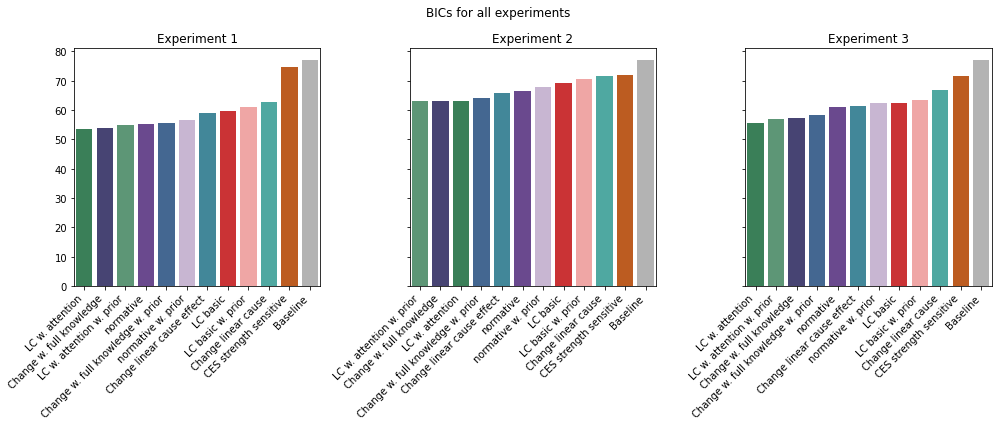

In [179]:

fig, axs = plt.subplots(1, len(experiments), figsize=(14, 6), sharey=True)

for i, experiment in enumerate(experiments):
    df_exp = df_bic[df_bic.experiment == experiment]
    df_exp_plot = df_exp[[col for col in df_exp.columns if col != 'experiment']]
    df_exp_plot = df_exp_plot[df_exp_plot.mean().sort_values().index]

    colors = gen_colors(df_exp_plot.columns, color_dict)
    sns.set_palette(colors)
    sns.barplot(data=df_exp_plot, ax=axs[i], ci=None)
    axs[i].set_xticklabels(df_exp_plot.columns, rotation=45, ha='right')
    axs[i].set_title(f'Experiment {experiment[-1]}')

fig.suptitle('BICs for all experiments')
plt.tight_layout()
plt.show()

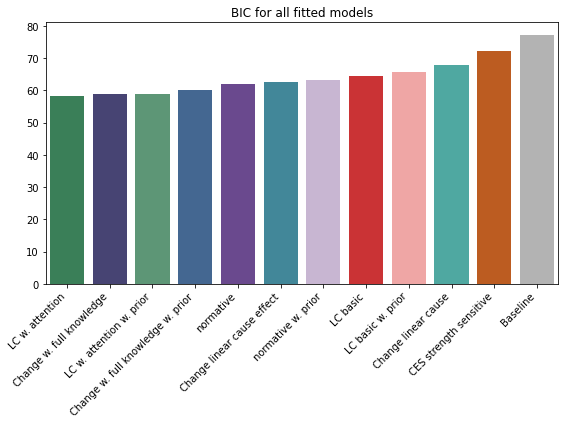

In [182]:
df_bic_plot = df_bic[[col for col in df_bic.columns if col != 'experiment']]
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

colors = gen_colors(df_bic_plot.columns, color_dict)
sns.set_palette(colors)

sns.barplot(data=df_bic_plot, ax=ax, ci=None)
ax.set_xticklabels(df_bic_plot.columns, rotation=45, ha='right')
ax.set_title('BIC for all fitted models')
plt.tight_layout()
plt.show()

In [30]:
select_all = [
    'LC w. attention',
    'LC w. attention w. prior',
    'Change w. full knowledge',
    'Change w. full knowledge w. prior',
    'normative',
    'normative w. prior',
    'LC basic',
    'LC basic w. prior',
    'CES_strength_sensitive',
    'Baseline'
]
select_lc_attention = [
    'LC w. attention',
    'LC w. attention w. prior',
    'Baseline'
]
select_lc = [
    'LC basic',
    'LC basic w. prior',
    'Baseline'
]
select_change = [
    'Change w. full knowledge',
    'Change w. full knowledge w. prior',
    'Change linear cause effect',
    'Change linear cause'
    'Baseline'
]
select_normative = [
    'normative',
    'normative w. prior',
    'Baseline'
]
select_ces = [
    'CES_strength_sensitive',
    'Baseline'
]

selections = {
    'select_all' : [
        'LC w. attention',
        'Change w. full knowledge',
        'normative',
        'LC basic',
        'CES strength sensitive',
        'Baseline'
    ],
    'select_lc_attention' : [
        'LC w. attention',
        'LC w. attention w. prior',
        'Baseline'
    ],
    'select_lc' : [
        'LC basic',
        'LC basic w. prior',
        'Baseline'
    ],
    'select_change' : [
        'Change w. full knowledge',
        'Change linear cause effect',
        'Change linear cause',
        'Baseline'
    ],
    'select_change_prior' : [
        'Change w. full knowledge',
        'Change w. full knowledge w. prior',
        'Baseline'
    ],
    'select_normative' : [
        'normative',
        'normative w. prior',
        'Baseline'
    ],
    'select_ces' : [
        'CES strength sensitive',
        'Baseline'
    ]
}

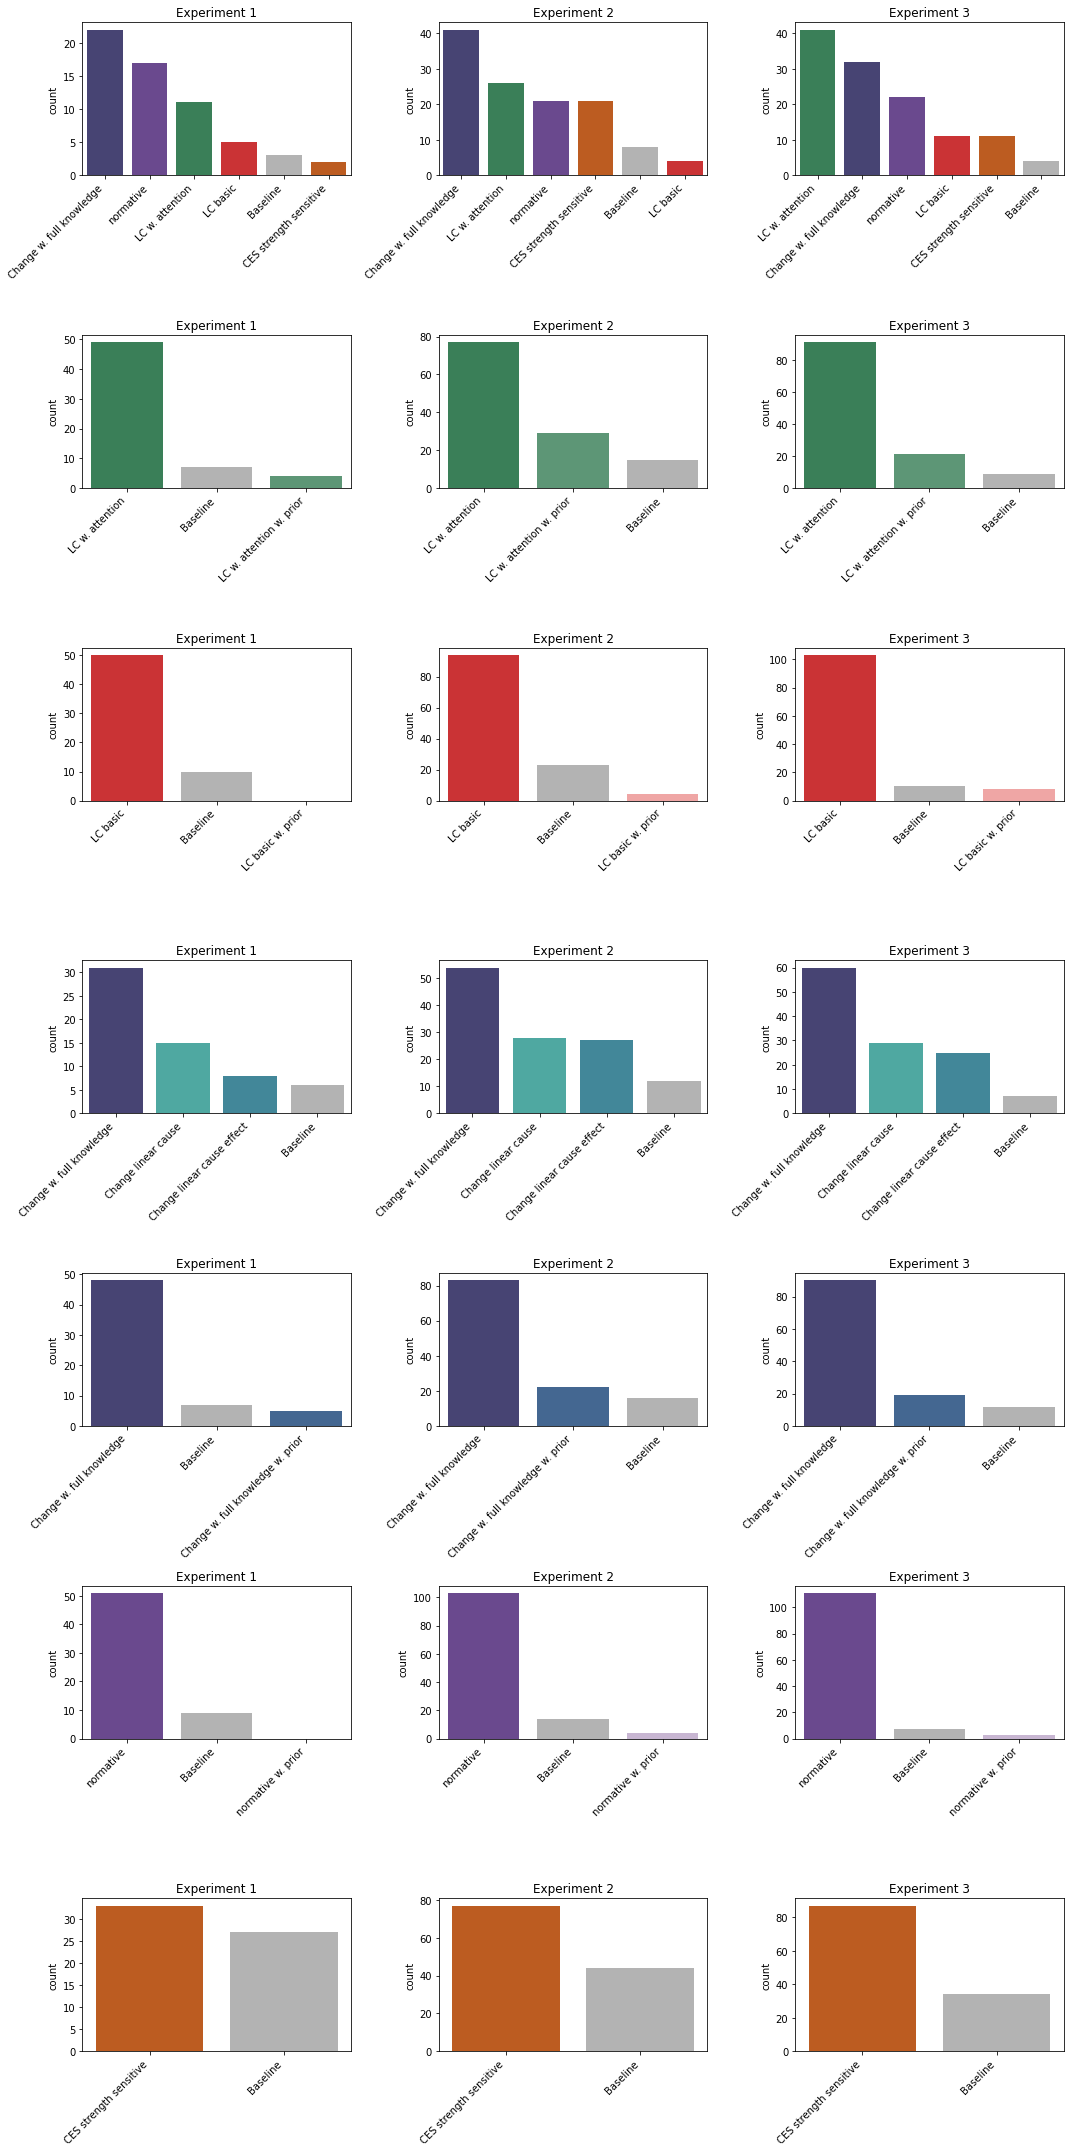

In [183]:
fig, axs = plt.subplots(len(selections), len(experiments), figsize=(15, 30))

for i, select in enumerate(selections.keys()):
    
    df_bic['best'] = df_bic[selections[select]].apply(lambda x: np.argmin(x), axis=1)
    df_bic['best'] = df_bic['best'].replace(np.arange(len(selections[select])), selections[select])
    
    for j, experiment in enumerate(experiments):
        df_exp = df_bic[df_bic.experiment == experiment]
        df_exp_plot = df_exp[['best', 'experiment']]

        df_order = pd.DataFrame(index=selections[select])
        df_order['counts'] = 0
        df_order.loc[df_exp_plot.best.value_counts().index, 'counts'] = df_exp_plot.best.value_counts().values

        colors = gen_colors(df_order.counts.sort_values(ascending=False).index, color_dict)
        sns.set_palette(colors)

        sns.countplot(x='best', data=df_exp_plot, order=df_order.counts.sort_values(ascending=False).index, ax=axs[i, j])
        axs[i, j].set_xticklabels(axs[i, j].get_xticklabels(), rotation=45, ha='right')
        axs[i, j].set_xlabel('')
        axs[i, j].set_title(f'Experiment {experiment[-1]}')

#fig.suptitle('Participants best fit for all experiments')
plt.tight_layout()
plt.show()
        

In [190]:
select_keys = {
    'attention' : [
        'LC w. attention',
        'LC w. attention w. prior',
        'Baseline'
    ],
    'change' : [
        'Change w. full knowledge',
        'Change w. full knowledge w. prior',
        'Baseline'
    ]
}

for i, select in enumerate(select_keys.keys()):
    df_bic[f'best_{select}'] = df_bic[select_keys[select]].apply(lambda x: np.argmin(x), axis=1)
    df_bic[f'best_{select}'] = df_bic[f'best_{select}'].replace(np.arange(len(select_keys[select])), select_keys[select])

In [195]:
prior_best_attention = df_bic[df_bic.best_attention == 'LC w. attention w. prior'].index
prior_best_change = df_bic[df_bic.best_change == 'Change w. full knowledge w. prior'].index

In [228]:
print(prior_best_attention.size)
print(prior_best_change.size)

intersection = list(set(prior_best_attention).intersection(prior_best_change))

df_prior_att = df[df.model_name.isin(['LC w. attention w. prior'])]
df_prior_change = df[df.model_name.isin(['change w. full knowledge w. prior'])]
df_prior = df[df.model_name.isin(['LC w. attention w. prior', 'change w. full knowledge w. prior'])]

54
46


In [265]:
df_prior = pd.DataFrame(index=pids, columns=['experiment', 'attention_bic', 'attention_prior', 'change_bic', 'change_prior'])

df_prior['experiment'] = experiments_series
df_prior['attention_bic'] = df[df.model_name == 'LC w. attention w. prior'].bic.to_list()
df_prior['change_bic'] = df[df.model_name == 'Change w. full knowledge w. prior'].bic.to_list()

df_prior['attention_prior'] = df[df.model_name == 'LC w. attention w. prior'].apply(lambda x: float(" ".join(x.params[1:-1].split()).split(' ')[-1]), axis=1).to_list()
df_prior['change_prior'] = df[df.model_name == 'Change w. full knowledge w. prior'].apply(lambda x: float(" ".join(x.params[1:-1].split()).split(' ')[-1]), axis=1).to_list()

df_prior.to_csv('/mnt/c/Users/vbtes/CompProjects/vbtCogSci/csl_global_analysis/data/prior_fitting_data.csv', index=False)

attention_bic      58.962994
attention_prior    22.937743
change_bic         60.079349
change_prior       26.074445
dtype: float64

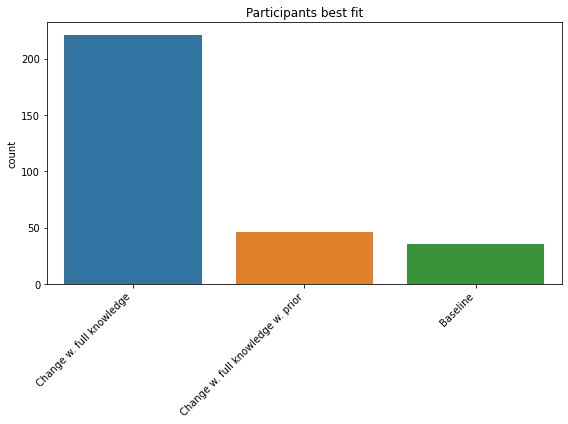

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

df_bic_plot = df_bic[['best', 'experiment']]

df_order = pd.DataFrame(index=cols)
df_order['counts'] = 0
df_order.loc[df_bic_plot.best.value_counts().index, 'counts'] = df_bic_plot.best.value_counts().values

sns.countplot(x='best', data=df_bic_plot, order=df_order.counts.sort_values(ascending=False).index, ax=ax)

ax.set_xticklabels(axs[i].get_xticklabels(), rotation=45, ha='right')
ax.set_xlabel('')

ax.set_title('Participants best fit')
plt.tight_layout()
plt.show()